In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from dnn_app_utils_v2 import *
import pywt

## Activation Functions

In [76]:
def relu(Z):
    A = np.maximum(0,Z)
    return A

def tanh(Z):
    A = (np.exp(Z)-np.exp(-Z))/(np.exp(Z) + np.exp(-Z))
    return A

def leaky_relu(Z):
    
    A = np.maximum(0.01*Z,Z)
    return A

def gelu(Z):
    A = 0.5 * Z * (1 + np.tanh(np.sqrt(2 / np.pi) * (Z + 0.044715 * Z**3)))
    return A

def softsign(Z):
    
    Zprime = abs(Z)
    
    A = Zprime/(1+Zprime)
    return A

def softplus(Z):
    
    A = np.log(1+(np.exp(Z)))
    return A


def elu(Z):
    
    alpha = 1.657

    A = np.where(Z <= 0, alpha * (np.exp(Z) - 1), Z)
    return A

def selu(Z):
    
    alpha = 1.657
    lambd = 1.056
    A = np.where(Z <= 0, lambd * alpha * (np.exp(Z) - 1), Z)
    return A

def prelu(Z):
    a = 0.1
    A = np.maximum(a*Z,Z)
    return A

def archtan(Z):
       
    A = np.arctan(Z)
    return A

def bendidentity(Z):
        
    A = (np.sqrt(((Z**2)+1)-1)/2)+Z
    return A

def silu(Z):
        
    A = Z/(1+np.exp(-Z))
    return A

def sinc(Z):
        
    A = np.sinc(Z)
    return A

def gaussian(Z):
        
    A = (np.exp)((-Z)**2)
    return A

def softthreshold(Z):
    
    
    A = pywt.threshold(Z, value=0.1,mode = 'soft')
    return A


## Backward Activation Functions

In [77]:
def relu_backward(dA, cache):
    Z = cache
    dZ = np.multiply(dA,(np.where(Z>=0,1,0)))
    return dZ

def tanh_backward(dA, Z):
    
    s = (np.exp(Z)-np.exp(-Z))/(np.exp(Z) + np.exp(-Z))
    dZ = dA * (1-s**2)
    return dZ

def leaky_relu_backward(dA, cache):
       
    Z = cache
    dZ = np.multiply(dA, (np.where(Z>=0, 1, 0.01)))
    return dZ

def gelu_backward(dA, cache):
        
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    return dZ

def softsign_backward(dA, cache):
    
    Z = cache
    
    Zprime = abs(Z)
    
    dZ = dA * (1/((1+Zprime)**2))
    return dZ

def softplus_backward(dA, cache):
        
    Z = cache
    
    dZ = dA * (1/(1 + np.exp(-Z)))
    return dZ

def elu_backward(dA, cache):
        
    Z = cache
    alpha = 1.657
    dZ = dA * np.where(Z <= 0, alpha * np.exp(Z) , Z)
    return dZ

def selu_backward(dA, cache):
        
    Z = cache
    alpha = 1.657
    lambd = 1.056
    dZ = dA * np.where(Z <= 0, lambd * alpha * np.exp(Z) , Z)
    return dZ

def silu_backward(dA, cache):
        
    Z = cache
    
    dZ = dA *((1+np.exp(-Z)+Z*np.exp(-Z))/(1+np.exp(-Z))**2)
    return dZ

def prelu_backward(dA, cache):
        
    Z = cache
    alpha = 0.005
    dZ = np.multiply(dA , (np.where(Z<0, alpha, 1)))
    return dZ

def archtan_backward(dA, cache):
        
    Z = cache
    
    dZ = dA * (1/(Z**2 +1))
    return dZ

def bendidentity_backward(dA, cache):
        
    Z = cache
    
    dZ = dA * ((Z/(2* np.sqrt((Z**2)+1))) + 1)
    return dZ

def sinc_backward(dA, cache):
        
    Z = cache
    
    dZ= dA *(((np.cos(Z))/Z)-((np.sin(Z))/(Z**2)))
    return dZ

def gaussian_backward(dA, cache):
    
    Z = cache
    s = (np.exp)((-Z)**2)
    dZ = - dA * Z *s
    return dZ

def softthreshold_backward(dA, cache):
    Z = cache
    lambd = 0.1
    Zprime = abs(Z)
    dZ = np.multiply(dA,np.where(Zprime <= lambd,0,1))
    return dZ

    

## Initializing parameters

In [78]:
def initialize_params(layer_sizes):
    params = {}
    for i in range(1, len(layer_sizes)):
        params['W' + str(i)] = np.random.randn(layer_sizes[i], layer_sizes[i-1])*0.01
        params['B' + str(i)] = np.random.randn(layer_sizes[i],1)*0.01
    return params

## Forward Propagation

In [79]:
def forward_propagation(X_train, params):
    layers = len(params)//2
    values = {}
    for i in range(1, layers+1):
        if i==1:
            values['Z' + str(i)] = np.dot(params['W' + str(i)], X_train) + params['B' + str(i)]
            #values['A' + str(i)] = relu(values['Z' + str(i)])
            #values['A' + str(i)] = tanh(values['Z' + str(i)])
            #values['A' + str(i)] = leaky_relu(values['Z' + str(i)])
            #values['A' + str(i)] = gelu(values['Z' + str(i)])
            #values['A' + str(i)] = softsign(values['Z' + str(i)])
            #values['A' + str(i)] = softplus(values['Z' + str(i)])
            #values['A' + str(i)] = elu(values['Z' + str(i)])
            #values['A' + str(i)] = selu(values['Z' + str(i)])
            #values['A' + str(i)] = prelu(values['Z' + str(i)])
            #values['A' + str(i)] = archtan(values['Z' + str(i)])
            #values['A' + str(i)] = bendidentity(values['Z' + str(i)])
            #values['A' + str(i)] = silu(values['Z' + str(i)])
            #values['A' + str(i)] = sinc(values['Z' + str(i)])
            #values['A' + str(i)] = gaussian(values['Z' + str(i)])
            values['A' + str(i)] = softthreshold(values['Z' + str(i)])
        else:
            values['Z' + str(i)] = np.dot(params['W' + str(i)], values['A' + str(i-1)]) + params['B' + str(i)]
            if i==layers:
                values['A' + str(i)] = values['Z' + str(i)]
            else:
                #values['A' + str(i)] = relu(values['Z' + str(i)])
                #values['A' + str(i)] = tanh(values['Z' + str(i)])
                #values['A' + str(i)] = leaky_relu(values['Z' + str(i)])
                #values['A' + str(i)] = gelu(values['Z' + str(i)])
                #values['A' + str(i)] = softsign(values['Z' + str(i)])
                #values['A' + str(i)] = softplus(values['Z' + str(i)])
                #values['A' + str(i)] = elu(values['Z' + str(i)])
                #values['A' + str(i)] = selu(values['Z' + str(i)])
                #values['A' + str(i)] = prelu(values['Z' + str(i)])
                #values['A' + str(i)] = archtan(values['Z' + str(i)])
                #values['A' + str(i)] = bendidentity(values['Z' + str(i)])
                #values['A' + str(i)] = silu(values['Z' + str(i)])
                #values['A' + str(i)] = sinc(values['Z' + str(i)])
                #values['A' + str(i)] = gaussian(values['Z' + str(i)])
                values['A' + str(i)] = softthreshold(values['Z' + str(i)])
    return values

## Cost Calculation ( Linear Regression)

In [80]:
#def compute_cost(values, Y_train):
   # layers = len(values)//2
   # Y_pred = values['A' + str(layers)]
   # cost = 1/(2*len(Y_train)) * np.sum(np.square(Y_pred - Y_train))
   # return cost

## Cost Calculation (Logistic Regression)

In [81]:
def compute_cost(values, Y_train):
    layers = len(values)//2
    Y_pred = values['A' + str(layers)]
    m = len(Y_train)
    cost = (1./m) * (-np.dot(Y_train,np.log(Y_pred).T) - np.dot(1-Y_train, np.log(1-Y_pred).T))
    cost = np.squeeze(cost) 
    return cost

## Back Propagation

In [82]:
def backward_propagation(params, values, X_train, Y_train):
    layers = len(params)//2
    m = len(Y_train)
    grads = {}
    for i in range(layers,0,-1):
        if i==layers:
            dA = 1/m * (values['A' + str(i)] - Y_train)
            dZ = dA
        else:
            dA = np.dot(params['W' + str(i+1)].T, dZ)
            #dZ = np.multiply(dA,(1-(tanh(values['A' + str(i)]))**2))
            #dZ = np.multiply(dA, np.where(values['A' + str(i)]>=0, 1, 0))
            #dZ = np.multiply(dA, np.where(values['A' + str(i)]>=0, 1, 0.01))
            #dZ = relu_backward(dA,values['A' + str(i)])
            #dZ = tanh_backward(dA,values['A' + str(i)])
            #dZ = leaky_relu_backward(dA,values['A' + str(i)])
            #dZ = gelu_backward(dA,values['A' + str(i)])
            #dZ = softsign_backward(dA,values['A' + str(i)])
            #dZ = softplus_backward(dA,values['A' + str(i)])
            #dZ = elu_backward(dA,values['A' + str(i)])
            #dZ = selu_backward(dA,values['A' + str(i)])
            #dZ = prelu_backward(dA,values['A' + str(i)])
            #dZ = archtan_backward(dA,values['A' + str(i)])
            #dZ = bendidentity_backward(dA,values['A' + str(i)])
            #dZ = silu_backward(dA,values['A' + str(i)])
            #dZ = sinc_backward(dA,values['A' + str(i)])
            #dZ = gaussian_backward(dA,values['A' + str(i)])
            dZ = softthreshold_backward(dA,values['A' + str(i)])
        if i==1:
            grads['W' + str(i)] = 1/m * np.dot(dZ, X_train.T)
            grads['B' + str(i)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        else:
            grads['W' + str(i)] = 1/m * np.dot(dZ,values['A' + str(i-1)].T)
            grads['B' + str(i)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    return grads

## Updating Parameters

In [83]:
def update_params(params, grads, learning_rate):
    layers = len(params)//2
    params_updated = {}
    for i in range(1,layers+1):
        params_updated['W' + str(i)] = params['W' + str(i)] - learning_rate * grads['W' + str(i)]
        params_updated['B' + str(i)] = params['B' + str(i)] - learning_rate * grads['B' + str(i)]
    return params_updated

## Train Model

In [84]:
def model(X_train, Y_train, layer_sizes, num_iters, learning_rate):
    params = initialize_params(layer_sizes)
    costs =[]
    for i in range(num_iters):
        values = forward_propagation(X_train.T, params)
        cost = compute_cost(values, Y_train.T)
        grads = backward_propagation(params, values,X_train.T, Y_train.T)
        params = update_params(params, grads, learning_rate)
        print('Cost at iteration ' + str(i+1) + ' = ' + str(cost) + '\n')
        
        if i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return params

## Computing Accuracy

In [85]:
def compute_accuracy(X_train, X_test, Y_train, Y_test, params):
    values_train = forward_propagation(X_train.T, params)
    values_test = forward_propagation(X_test.T, params)
    
    train_acc = mean_squared_error(Y_train, values_train['A' + str(len(layer_sizes)-1)].T)
    test_acc = mean_squared_error(Y_test, values_test['A' + str(len(layer_sizes)-1)].T)
    return train_acc, test_acc


## Predicting

In [86]:
def predict(X, params):
    values = forward_propagation(X.T, params)
    predictions = values['A' + str(len(values)//2)].T
    return predictions

In [87]:
data = load_digits() 
X,Y = data["data"], data["target"] 

In [88]:
print(data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [89]:
bos = pd.DataFrame(data.data)
print(bos.head())

    0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]


In [90]:
bos.columns = data.feature_names
print(bos.head())

   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        5.0        0.0   
3        0.0        0.0        0.0        8.0  ...        9.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
0        0.0        0.0        6.0       13.0

In [91]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2) #Split data into train and test sets in 80-20 ratio

In [92]:
layer_sizes = [64,10,5, 1] 

In [93]:
num_iters =2000
learning_rate = 0.03  

Cost at iteration 1 = 25.135077211777453

Cost at iteration 2 = 25.023551238046895

Cost at iteration 3 = 24.914706781841765

Cost at iteration 4 = 24.808417601215844

Cost at iteration 5 = 24.704566164434716

Cost at iteration 6 = 24.603042866662033

Cost at iteration 7 = 24.503745332767977

Cost at iteration 8 = 24.406577795141175

Cost at iteration 9 = 24.3114505370252

Cost at iteration 10 = 24.218279393269473

Cost at iteration 11 = 24.126985301531697

Cost at iteration 12 = 24.037493897935057

Cost at iteration 13 = 23.949735151998407

Cost at iteration 14 = 23.863643036349146

Cost at iteration 15 = 23.77915522731636

Cost at iteration 16 = 23.696212833003056

Cost at iteration 17 = 23.61476014586559

Cost at iteration 18 = 23.534744417196684

Cost at iteration 19 = 23.45611565122572

Cost at iteration 20 = 23.37882641682329

Cost at iteration 21 = 23.302831675034337

Cost at iteration 22 = 23.22808862086943

Cost at iteration 23 = 23.154556537962712

Cost at iteration 24 = 23.0

Cost at iteration 225 = 16.570848002315625

Cost at iteration 226 = 16.5535305449233

Cost at iteration 227 = 16.536277202379196

Cost at iteration 228 = 16.519087493304276

Cost at iteration 229 = 16.50196094171834

Cost at iteration 230 = 16.48489707695963

Cost at iteration 231 = 16.467895433605843

Cost at iteration 232 = 16.45095555139668

Cost at iteration 233 = 16.434076975157755

Cost at iteration 234 = 16.417259254725987

Cost at iteration 235 = 16.40050194487626

Cost at iteration 236 = 16.3838046052495

Cost at iteration 237 = 16.36716680028199

Cost at iteration 238 = 16.350588099135997

Cost at iteration 239 = 16.33406807563167

Cost at iteration 240 = 16.31760630818014

Cost at iteration 241 = 16.30120237971776

Cost at iteration 242 = 16.284855877641636

Cost at iteration 243 = 16.268566393746212

Cost at iteration 244 = 16.252333524161

Cost at iteration 245 = 16.236156869289402

Cost at iteration 246 = 16.22003603374868

Cost at iteration 247 = 16.203970626310788

Cost

Cost at iteration 487 = 13.38942972377696

Cost at iteration 488 = 13.380579460286123

Cost at iteration 489 = 13.371745387617441

Cost at iteration 490 = 13.362927444393666

Cost at iteration 491 = 13.354125569585275

Cost at iteration 492 = 13.345339702507847

Cost at iteration 493 = 13.33656978281947

Cost at iteration 494 = 13.327815750518177

Cost at iteration 495 = 13.319077545939372

Cost at iteration 496 = 13.310355109753326

Cost at iteration 497 = 13.301648382962679

Cost at iteration 498 = 13.29295730689994

Cost at iteration 499 = 13.284281823225037

Cost at iteration 500 = 13.27562187392293

Cost at iteration 501 = 13.266977401301123

Cost at iteration 502 = 13.25834834798733

Cost at iteration 503 = 13.249734656927108

Cost at iteration 504 = 13.241136271381496

Cost at iteration 505 = 13.232553134924686

Cost at iteration 506 = 13.223985191441765

Cost at iteration 507 = 13.215432385126375

Cost at iteration 508 = 13.206894660478516

Cost at iteration 509 = 13.1983719623

Cost at iteration 739 = 11.551093525314354

Cost at iteration 740 = 11.545005543234469

Cost at iteration 741 = 11.538924955401384

Cost at iteration 742 = 11.53285174279135

Cost at iteration 743 = 11.526785886453638

Cost at iteration 744 = 11.520727367510151

Cost at iteration 745 = 11.514676167155049

Cost at iteration 746 = 11.508632266654406

Cost at iteration 747 = 11.502595647345798

Cost at iteration 748 = 11.496566290638

Cost at iteration 749 = 11.490544178010571

Cost at iteration 750 = 11.48452929101351

Cost at iteration 751 = 11.478521611266935

Cost at iteration 752 = 11.472521120460659

Cost at iteration 753 = 11.466527800353898

Cost at iteration 754 = 11.460541632774898

Cost at iteration 755 = 11.454562599620603

Cost at iteration 756 = 11.448590682856256

Cost at iteration 757 = 11.44262586451513

Cost at iteration 758 = 11.436668126698127

Cost at iteration 759 = 11.430717451573473

Cost at iteration 760 = 11.424773821376375

Cost at iteration 761 = 11.41883721840

Cost at iteration 996 = 10.18684570577918

Cost at iteration 997 = 10.18218630758842

Cost at iteration 998 = 10.177531076704854

Cost at iteration 999 = 10.172880005033758

Cost at iteration 1000 = 10.16823308450377

Cost at iteration 1001 = 10.16359030706682

Cost at iteration 1002 = 10.158951664698005

Cost at iteration 1003 = 10.154317149395538

Cost at iteration 1004 = 10.149686753180639

Cost at iteration 1005 = 10.145060468097443

Cost at iteration 1006 = 10.140438286212923

Cost at iteration 1007 = 10.135820199616806

Cost at iteration 1008 = 10.131206200421461

Cost at iteration 1009 = 10.126596280761854

Cost at iteration 1010 = 10.12199043279542

Cost at iteration 1011 = 10.117388648702017

Cost at iteration 1012 = 10.112790920683782

Cost at iteration 1013 = 10.108197240965126

Cost at iteration 1014 = 10.103607601792577

Cost at iteration 1015 = 10.099021995434734

Cost at iteration 1016 = 10.094440414182184

Cost at iteration 1017 = 10.0898628503474

Cost at iteration 101

Cost at iteration 1254 = 9.103508103182548

Cost at iteration 1255 = 9.099708580205961

Cost at iteration 1256 = 9.095911716578447

Cost at iteration 1257 = 9.092117508141758

Cost at iteration 1258 = 9.088325950747263

Cost at iteration 1259 = 9.084537040255897

Cost at iteration 1260 = 9.08075077253815

Cost at iteration 1261 = 9.076967143474036

Cost at iteration 1262 = 9.073186148953047

Cost at iteration 1263 = 9.069407784874134

Cost at iteration 1264 = 9.065632047145696

Cost at iteration 1265 = 9.061858931685517

Cost at iteration 1266 = 9.058088434420764

Cost at iteration 1267 = 9.054320551287946

Cost at iteration 1268 = 9.050555278232885

Cost at iteration 1269 = 9.046792611210702

Cost at iteration 1270 = 9.043032546185753

Cost at iteration 1271 = 9.039275079131656

Cost at iteration 1272 = 9.035520206031201

Cost at iteration 1273 = 9.031767922876385

Cost at iteration 1274 = 9.02801822566832

Cost at iteration 1275 = 9.024271110417258

Cost at iteration 1276 = 9.0205265

Cost at iteration 1557 = 8.057632568910211

Cost at iteration 1558 = 8.054484390076214

Cost at iteration 1559 = 8.051337944941134

Cost at iteration 1560 = 8.048193231289261

Cost at iteration 1561 = 8.045050246909039

Cost at iteration 1562 = 8.041908989593042

Cost at iteration 1563 = 8.03876945713796

Cost at iteration 1564 = 8.035631647344601

Cost at iteration 1565 = 8.032495558017871

Cost at iteration 1566 = 8.029361186966769

Cost at iteration 1567 = 8.026228532004371

Cost at iteration 1568 = 8.023097590947824

Cost at iteration 1569 = 8.019968361618343

Cost at iteration 1570 = 8.016840841841184

Cost at iteration 1571 = 8.013715029445647

Cost at iteration 1572 = 8.010590922265058

Cost at iteration 1573 = 8.00746851813678

Cost at iteration 1574 = 8.004347814902165

Cost at iteration 1575 = 8.001228810406571

Cost at iteration 1576 = 7.998111502499353

Cost at iteration 1577 = 7.9949958890338415

Cost at iteration 1578 = 7.991881967867343

Cost at iteration 1579 = 7.988769

Cost at iteration 1824 = 7.2724422756786655

Cost at iteration 1825 = 7.269689464790013

Cost at iteration 1826 = 7.266937916205662

Cost at iteration 1827 = 7.264187628529185

Cost at iteration 1828 = 7.261438600366412

Cost at iteration 1829 = 7.25869083032538

Cost at iteration 1830 = 7.255944317016355

Cost at iteration 1831 = 7.253199059051819

Cost at iteration 1832 = 7.250455055046472

Cost at iteration 1833 = 7.247712303617205

Cost at iteration 1834 = 7.244970803383137

Cost at iteration 1835 = 7.242230552965568

Cost at iteration 1836 = 7.239491550987999

Cost at iteration 1837 = 7.236753796076118

Cost at iteration 1838 = 7.234017286857793

Cost at iteration 1839 = 7.23128202196308

Cost at iteration 1840 = 7.228548000024211

Cost at iteration 1841 = 7.225815219675575

Cost at iteration 1842 = 7.223083679553739

Cost at iteration 1843 = 7.2203533782974345

Cost at iteration 1844 = 7.217624314547534

Cost at iteration 1845 = 7.214896486947075

Cost at iteration 1846 = 7.21216

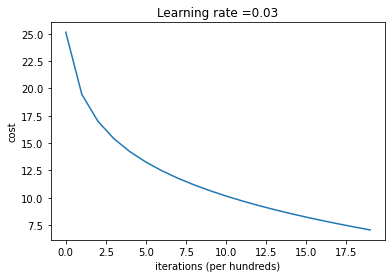

In [94]:
params = model(X_train, Y_train, layer_sizes, num_iters, learning_rate) 

In [95]:
train_acc, test_acc = compute_accuracy(X_train, X_test, Y_train, Y_test, params) 
print('Root Mean Squared Error on Training Data = ' + str(train_acc))
print('Root Mean Squared Error on Test Data = ' + str(test_acc))

Root Mean Squared Error on Training Data = 26.86428082404157
Root Mean Squared Error on Test Data = 26.1514743736085
